In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/drugnew.csv')

In [4]:
data.head()

,Name,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sides,UsefulCount,Sex
0,Adelaide,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,"Drowsiness, dizziness , dry mouth /nose/thro...",0,F
1,Adelaide,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,"Drowsiness, dizziness , dry mouth /nose/thro...",1,F
2,Adelaide,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,,0,F
3,Adelaide,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,,0,F
4,Adelaide,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,,1,F


In [5]:
data.tail()

,Name,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sides,UsefulCount,Sex
362801,Eloi,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,"Nausea , headache , vomiting , drowsiness, g...",2,M
362802,Elysee,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,"Nausea , headache , vomiting , drowsiness, g...",16,M
362803,Emile,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,"Nausea , headache , vomiting , drowsiness, g...",3,M
362804,Emile,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,"Nausea , headache , vomiting , drowsiness, g...",1,M
362805,Emile,45-54,Stop Smoking,11-12-2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,"Nausea , headache , vomiting , drowsiness, g...",3,M


# BASIC DETAILS OF DATASET


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Age            362806 non-null  object
 2   Condition      362806 non-null  object
 3   Date           362806 non-null  object
 4   Drug           362806 non-null  object
 5   DrugId         362806 non-null  int64 
 6   EaseofUse      362806 non-null  int64 
 7   Effectiveness  362806 non-null  int64 
 8   Reviews        362769 non-null  object
 9   Satisfaction   362806 non-null  int64 
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Sex            362806 non-null  object
dtypes: int64(5), object(8)
memory usage: 36.0+ MB


In [7]:
data.columns


Index(['Name', 'Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sides', 'UsefulCount',
       'Sex'],
      dtype='object')

In [8]:
data.shape

(362806, 13)

In [9]:
#Condition
data.Condition.value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [10]:
#Drug
data.Drug.value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

array([[<Axes: title={'center': 'DrugId'}>,
        <Axes: title={'center': 'EaseofUse'}>],
       [<Axes: title={'center': 'Effectiveness'}>,
        <Axes: title={'center': 'Satisfaction'}>],
       [<Axes: title={'center': 'UsefulCount'}>, <Axes: >]], dtype=object)

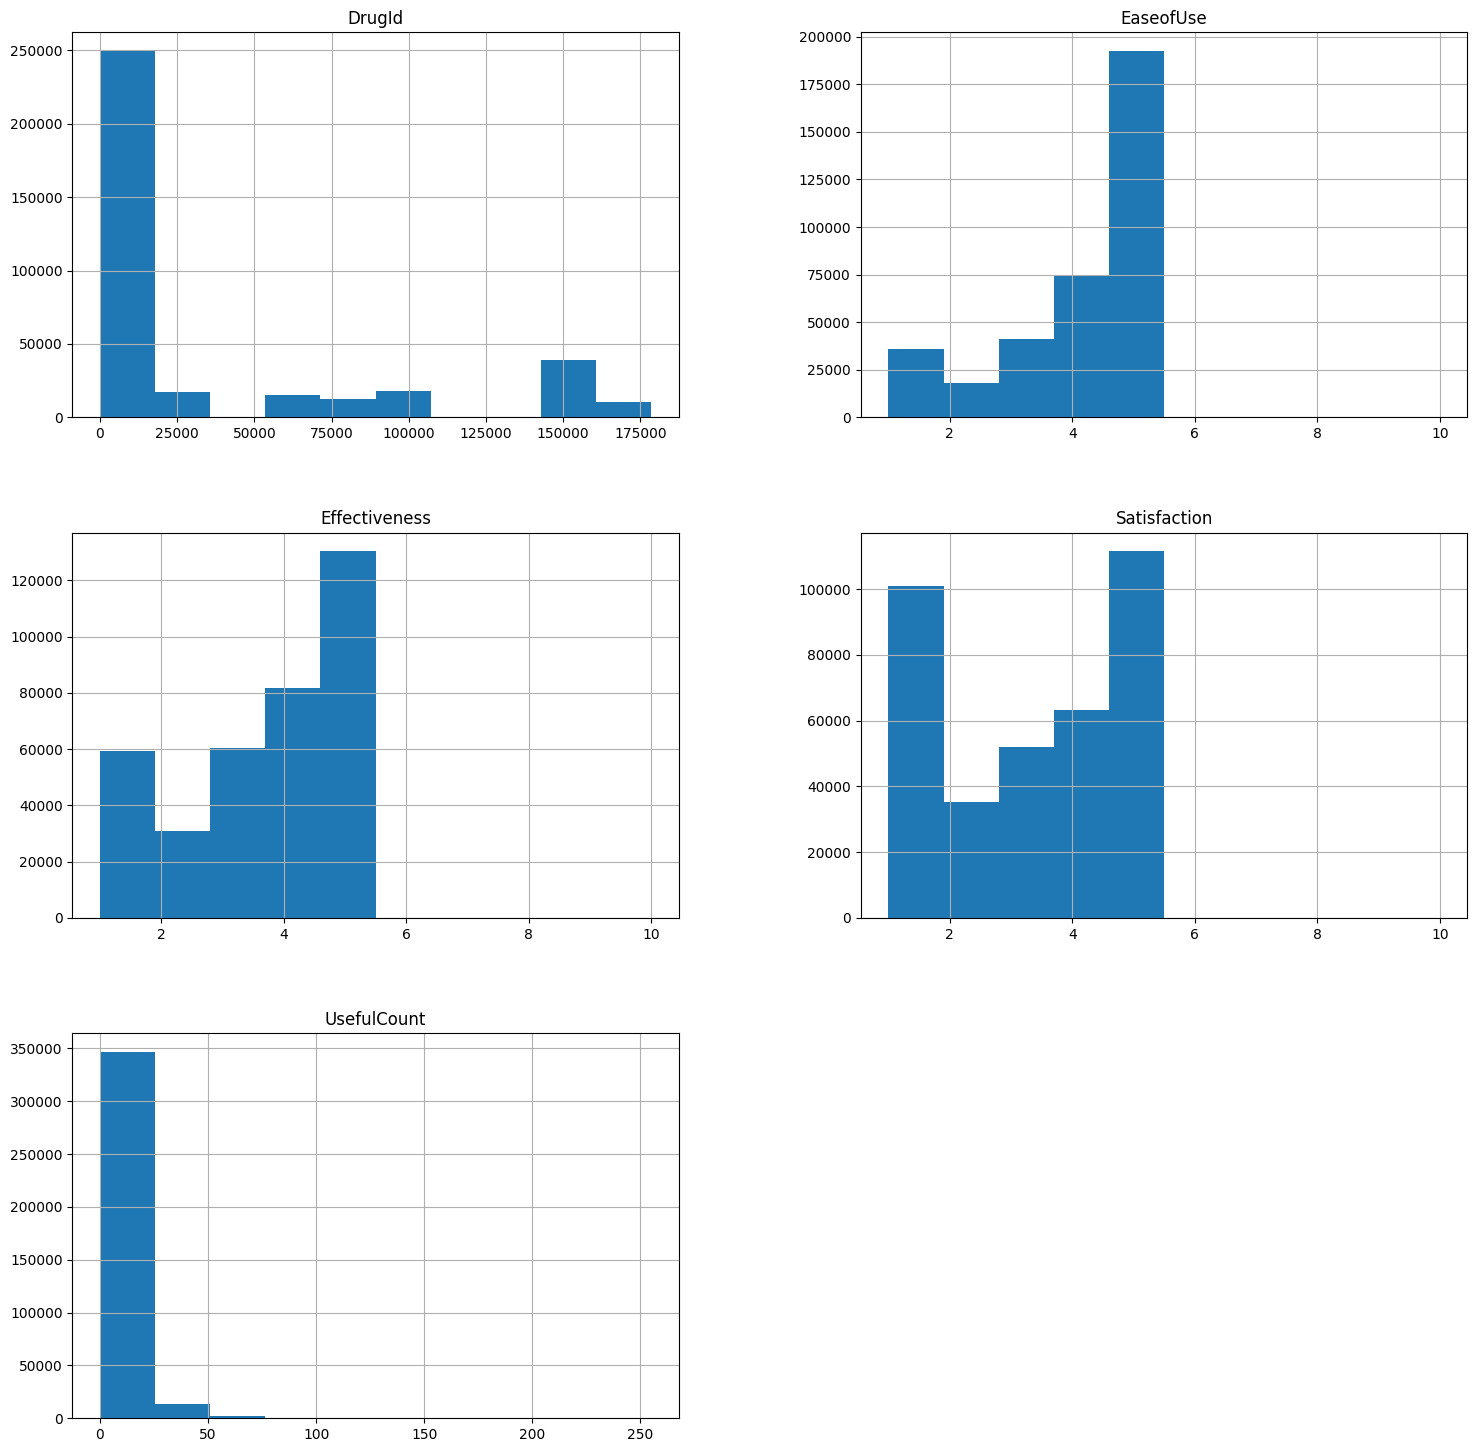

In [11]:
#Histograms
#(histogram is a graphical representation of data that shows the distribution of a continuous variable)
data.hist( figsize=(18,18))

# Data Pre-processing

In [12]:
data.isna().sum()

Name              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sides             0
UsefulCount       0
Sex               0
dtype: int64

In [13]:
data.Reviews.nunique()


250159

In [14]:
#Since Reviews is having more than half of the values as unique we can neglect this column.
data.drop("Reviews",axis=1,inplace=True)

In [15]:
data.head()

,Name,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sides,UsefulCount,Sex
0,Adelaide,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,5,"Drowsiness, dizziness , dry mouth /nose/thro...",0,F
1,Adelaide,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,5,"Drowsiness, dizziness , dry mouth /nose/thro...",1,F
2,Adelaide,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,3,,0,F
3,Adelaide,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,1,,0,F
4,Adelaide,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,1,,1,F


In [16]:
data.isna().sum()

Name             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sides            0
UsefulCount      0
Sex              0
dtype: int64

In [17]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [18]:
data.apply(lambda x: len(x.unique()))

Name             2137
Age                12
Condition        1806
Date             4524
Drug             7093
DrugId           6572
EaseofUse           7
Effectiveness       7
Satisfaction        7
Sides            1651
UsefulCount       148
Sex                 2
dtype: int64

In [19]:
# check for categorical attributes

cat_col = []
for x in data:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Name', 'Age', 'Condition', 'Date', 'Drug', 'Sides', 'Sex']

In [20]:

data.Drug.nunique()

7093

In [21]:
#unique number of side effects.
data.Sides.nunique()

1651

In [22]:
data.Drug.mode()
#cymbalta is the most occuring drug

0    cymbalta
Name: Drug, dtype: object

In [23]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Age            362806 non-null  object
 2   Condition      362806 non-null  object
 3   Date           362806 non-null  object
 4   Drug           362806 non-null  object
 5   DrugId         362806 non-null  int64 
 6   EaseofUse      362806 non-null  int64 
 7   Effectiveness  362806 non-null  int64 
 8   Satisfaction   362806 non-null  int64 
 9   Sides          362806 non-null  object
 10  UsefulCount    362806 non-null  int64 
 11  Sex            362806 non-null  object
dtypes: int64(5), object(7)
memory usage: 33.2+ MB



# Selection of Drug:We are selecting the dataset of drug named 'cymbalta' with DrugId =91491 .Because it is having the most occurences.

In [25]:
data=data.drop(data.loc[(data['Drug']!='cymbalta')].index)

In [26]:
data.shape
#now we have got only 4648 rows.

(4648, 12)

In [27]:
data.head()

,Name,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sides,UsefulCount,Sex
314212,Gabriel,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,5,"Nausea , dry mouth , constipation , loss of ...",12,M
314216,Gabriel,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,1,"Nausea , dry mouth , constipation , loss of ...",0,M
314223,Gabriel,45-54,Anxiousness associated with Depression,01-04-2020,cymbalta,91491,5,5,5,"Nausea , dry mouth , constipation , loss of ...",0,M
314235,Gabriel,35-44,Anxiousness associated with Depression,12-06-2019,cymbalta,91491,3,3,2,"Nausea , dry mouth , constipation , loss of ...",0,M
314246,Gabriel,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,2,"Nausea , dry mouth , constipation , loss of ...",1,M


In [28]:
data.Sides.nunique()

1

In [29]:
data['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4648
Name: Sides, dtype: int64

In [30]:
data['Satisfaction'].value_counts()

1    1490
5    1268
4     852
3     646
2     392
Name: Satisfaction, dtype: int64

In [31]:
data['UsefulCount'].unique()

array([ 12,   0,   1,   2,  11,  22,   3,  15,  27,  30,   4,   5,  19,
        28,  21,  36,  35,  34,  25,   8,   7,  18,  39,   9,  56,  29,
        71,  23,   6,  32,  24,  17,  13,  14,  10,  16,  20,  42, 103,
        38,  33,  26,  61,  41,  93,  90, 134, 145,  51,  43,  48,  31,
        82,  58,  46,  47,  45,  44,  60,  50, 116,  40,  65,  97,  77,
       129,  68,  59,  37])

In [32]:
data['Date'].nunique()

2189

In [33]:
data['EaseofUse'].value_counts()

5    2502
4     998
3     484
1     476
2     188
Name: EaseofUse, dtype: int64

Here we can drop the columns of Drug,Drug id ,sides because it is common.
The other columns such as date can also be dropped.
the column Name can also be dropped ,since name doesnt deal with the side effects of a drug.

In [34]:
data=data.drop(['Date','Drug','DrugId','Sides','Name'],axis=1)

In [35]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
314212,,Major Depressive Disorder,5,5,5,12,M
314216,45-54,Repeated Episodes of Anxiety,3,1,1,0,M
314223,45-54,Anxiousness associated with Depression,5,5,5,0,M
314235,35-44,Anxiousness associated with Depression,3,3,2,0,M
314246,55-64,Chronic Muscle or Bone Pain,2,2,2,1,M


In [36]:
data.isna().sum()

Age              0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Sex              0
dtype: int64

# Finding missing values

In [37]:
data['Age'].value_counts()
#there is a blank space ,so we can fill it with a value 3-6
# change the value 07 - Dec to 7-12

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
               118
75 or over     102
13-18           34
0-2              1
07-Dec           1
Name: Age, dtype: int64

In [38]:
data['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [39]:
data['Age'].replace(to_replace = ['07-Dec'], value = '7-12', inplace = True)

In [40]:
data['Age'].value_counts()


45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
3-6            118
75 or over     102
13-18           34
0-2              1
7-12             1
Name: Age, dtype: int64

In [41]:
data["Sex"].value_counts()

M    3451
F    1197
Name: Sex, dtype: int64

# Correlation Matrix

<ipython-input-42-38d7831940ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


<Axes: >

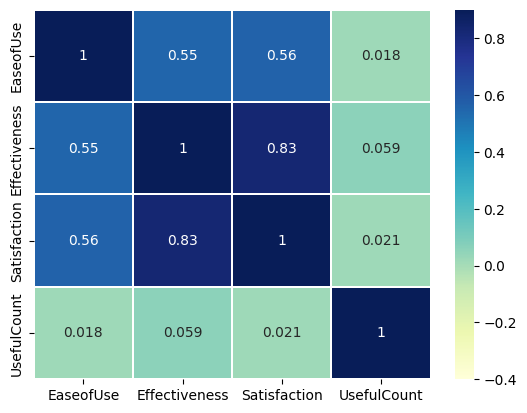

In [42]:
#CHECKING CORRELATION
corrmatrix = data.corr()

sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

HIGH LEVEL OF CORRELATION IS SEEN WITH EFFECTIVENESS AND SATISFACTION IN THE GRAPH.

In [43]:
data_cpy =data

# CHECK OUTLIERS

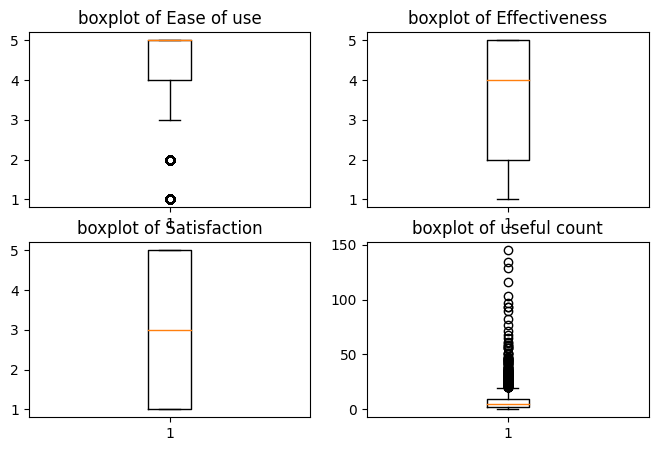

In [44]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.boxplot(data["EaseofUse"])
plt.title("boxplot of Ease of use")

plt.subplot(2,2,2)
plt.boxplot(data["Effectiveness"])
plt.title("boxplot of Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data["Satisfaction"])
plt.title("boxplot of Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data["UsefulCount"])
plt.title("boxplot of useful count")
plt.show()


There are outliers in useful count and ease of use

In [45]:
Q1=np.percentile(data["UsefulCount"],25,interpolation="midpoint")
Q3=np.percentile(data["UsefulCount"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)


lower limit= -8.5
upperlimit =  19.5


<ipython-input-45-7b1c0551fe3c>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data["UsefulCount"],25,interpolation="midpoint")
<ipython-input-45-7b1c0551fe3c>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data["UsefulCount"],75,interpolation="midpoint")


In [46]:
outlier = []
for x in data['UsefulCount']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier


[22,
 27,
 30,
 30,
 28,
 21,
 36,
 35,
 34,
 25,
 39,
 56,
 29,
 71,
 23,
 29,
 21,
 32,
 24,
 22,
 21,
 25,
 21,
 25,
 32,
 22,
 30,
 20,
 42,
 30,
 22,
 103,
 38,
 28,
 30,
 33,
 26,
 61,
 25,
 26,
 28,
 41,
 93,
 90,
 134,
 145,
 51,
 27,
 29,
 43,
 39,
 30,
 22,
 21,
 35,
 33,
 48,
 36,
 56,
 27,
 38,
 21,
 24,
 30,
 22,
 22,
 21,
 31,
 21,
 21,
 25,
 93,
 24,
 31,
 35,
 82,
 20,
 33,
 25,
 58,
 20,
 46,
 21,
 47,
 45,
 44,
 34,
 60,
 48,
 26,
 29,
 50,
 36,
 20,
 25,
 47,
 20,
 20,
 23,
 41,
 26,
 21,
 22,
 25,
 21,
 23,
 22,
 28,
 22,
 21,
 28,
 20,
 42,
 27,
 20,
 28,
 22,
 26,
 25,
 29,
 23,
 26,
 116,
 21,
 51,
 40,
 29,
 20,
 28,
 28,
 25,
 21,
 34,
 31,
 30,
 23,
 20,
 20,
 26,
 35,
 29,
 65,
 24,
 22,
 30,
 20,
 26,
 34,
 20,
 21,
 46,
 23,
 20,
 23,
 27,
 27,
 35,
 21,
 25,
 20,
 21,
 21,
 28,
 97,
 23,
 23,
 22,
 33,
 56,
 45,
 22,
 39,
 21,
 23,
 41,
 77,
 31,
 129,
 24,
 22,
 20,
 31,
 24,
 34,
 22,
 20,
 21,
 23,
 24,
 21,
 22,
 22,
 21,
 20,
 29,
 22,
 22,
 23,
 20,


In [47]:
data=data.drop(data.loc[data["UsefulCount"]>upper].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7924379c80a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7924379c85e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79243799bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7924379c8b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7924379c8dc0>],
 'means': []}

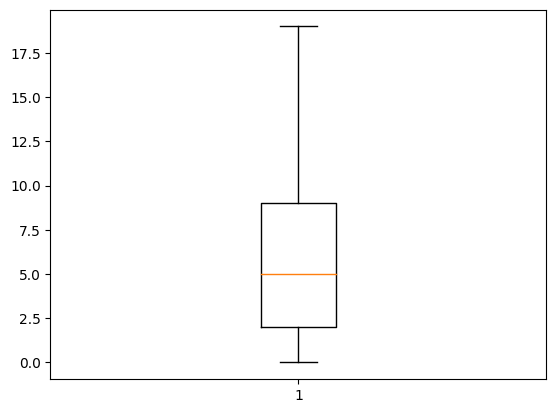

In [48]:
plt.boxplot(data["UsefulCount"])

Now the outliers in Useful Count is removed.

In [49]:
Q1=np.percentile(data["EaseofUse"],25,interpolation="midpoint")
Q3=np.percentile(data["EaseofUse"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)


lower limit= 2.5
upperlimit =  6.5


<ipython-input-49-e83595421db9>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data["EaseofUse"],25,interpolation="midpoint")
<ipython-input-49-e83595421db9>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data["EaseofUse"],75,interpolation="midpoint")


In [50]:
outlier = []
for x in data['EaseofUse']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier


[2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,


In [51]:
data=data.drop(data.loc[data["EaseofUse"]>upper].index)
data=data.drop(data.loc[data["EaseofUse"]<low].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x79243784c0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79243784c5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x792437813eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x79243784cb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x79243784cdc0>],
 'means': []}

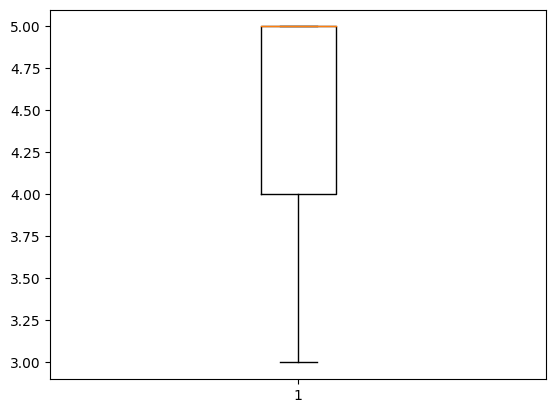

In [52]:
plt.boxplot(data["EaseofUse"])

Now we have removed all the outliers from the columns useful count and ease of use

In [53]:
data.shape

(3769, 7)

In [54]:
data_cpy.shape

(4648, 7)

In [55]:
#adding index column
list2=list(range(3769))
data=data.set_index([list2])

list3 = list(range(4648))
data_cpy=data_cpy.set_index([list3])


In [56]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,5,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,1,1,0,M
2,45-54,Anxiousness associated with Depression,5,5,5,0,M
3,35-44,Anxiousness associated with Depression,3,3,2,0,M
4,55-64,Anxiousness associated with Depression,3,3,1,1,M


In [57]:
data_cpy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,5,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,1,1,0,M
2,45-54,Anxiousness associated with Depression,5,5,5,0,M
3,35-44,Anxiousness associated with Depression,3,3,2,0,M
4,55-64,Chronic Muscle or Bone Pain,2,2,2,1,M


# Recode the values of Effectiveness to a categorical values.

In [58]:
data['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)

In [59]:
data['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)

In [60]:
data['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)

In [61]:
data['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)

In [62]:
data['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [63]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,no side effects,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,0,M
2,45-54,Anxiousness associated with Depression,5,no side effects,5,0,M
3,35-44,Anxiousness associated with Depression,3,moderate side effects,2,0,M
4,55-64,Anxiousness associated with Depression,3,moderate side effects,1,1,M


In [64]:
data_cpy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,no side effects,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,0,M
2,45-54,Anxiousness associated with Depression,5,no side effects,5,0,M
3,35-44,Anxiousness associated with Depression,3,moderate side effects,2,0,M
4,55-64,Chronic Muscle or Bone Pain,2,severe side effects,2,1,M


# VISUALIZATION

# Catplot of Satisfaction with respect to Sex column is given below.

<Figure size 1500x2000 with 0 Axes>

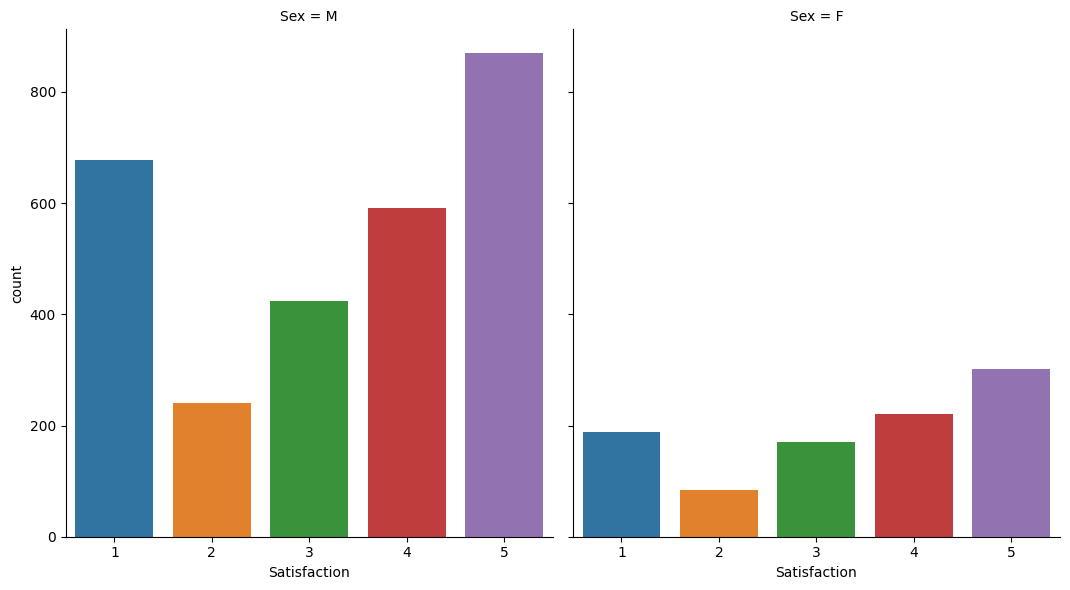

In [65]:
plt.figure(figsize=(15,20))
g = sns.catplot(x="Satisfaction",col="Sex",
                data=data, kind="count",
                height=6,aspect =.9);

# Pie chart of Percentage of Effectiveness.

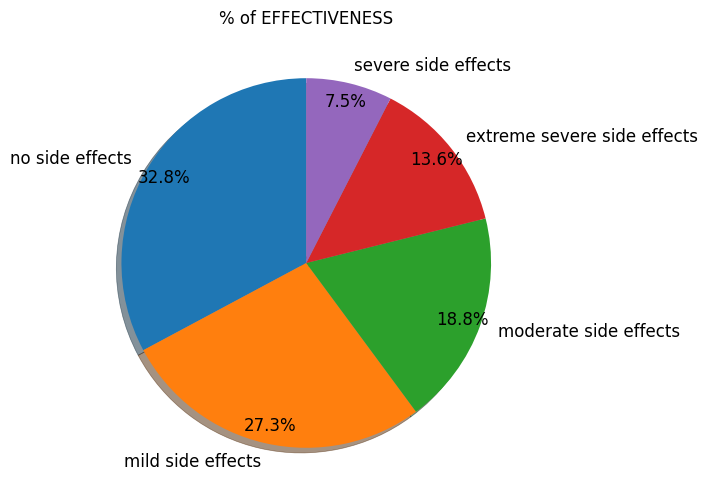

In [66]:

plt.figure(figsize=(10,6))
plt.title('% of EFFECTIVENESS')
tr = pd.DataFrame(data['Effectiveness'].value_counts())
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)

plt.show()

32% of people says that there is no side effects

# Pie Chart of Percentage of different conditions of People

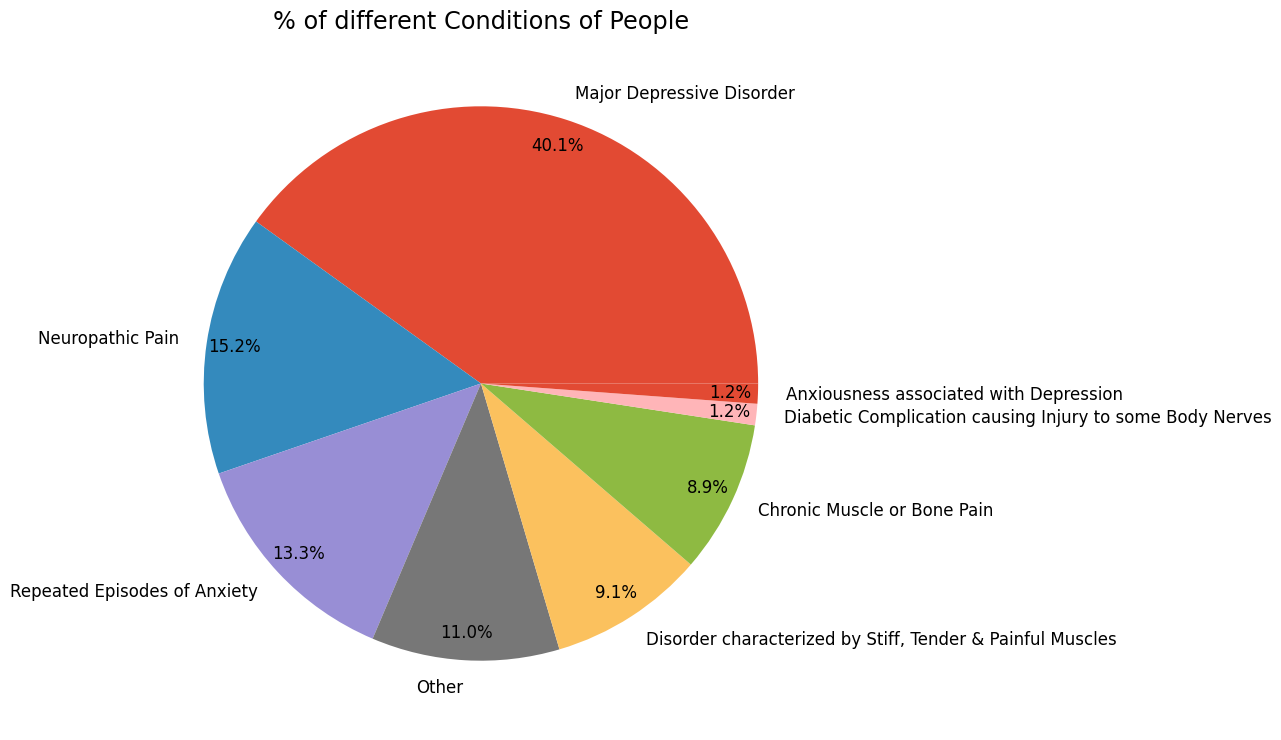

In [67]:
plt.figure(figsize=(15,9))
plt.title('% of different Conditions of People')
tr = pd.DataFrame(data['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)

plt.show()

 Persons with Major Depressive Disorder mostly take this drug.

# Count plot of various Age groups taken for this and their sex is displayed below.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

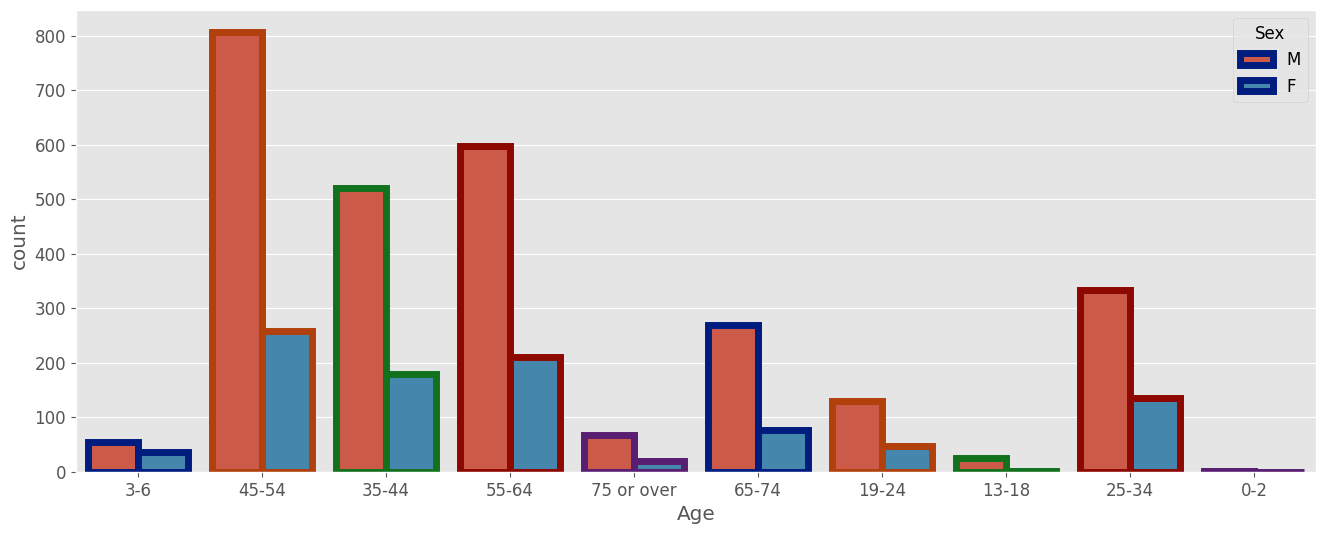

In [68]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Age",hue = "Sex" ,edgecolor=sns.color_palette("dark", 5),data=data,
                   linewidth=5,)
plt


The age group 45-54 is consuming this Drug more and a higher ratio of males consume this.

# Effect of Drug on Age group 45-54(most commonly used by)

In [69]:
dt=data.loc[(data['Age']=="45-54")]

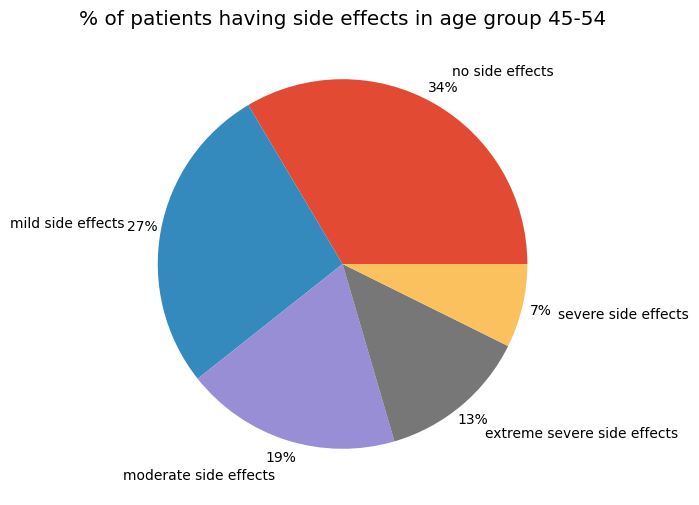

In [70]:
tr = pd.DataFrame(dt['Effectiveness'].value_counts())
tr_names = tr.index
count=tr['Effectiveness']

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of patients having side effects in age group 45-54')
plt.show()


# Scatter plot of relating variables Satisfaction with Sex

<Figure size 1000x1500 with 0 Axes>

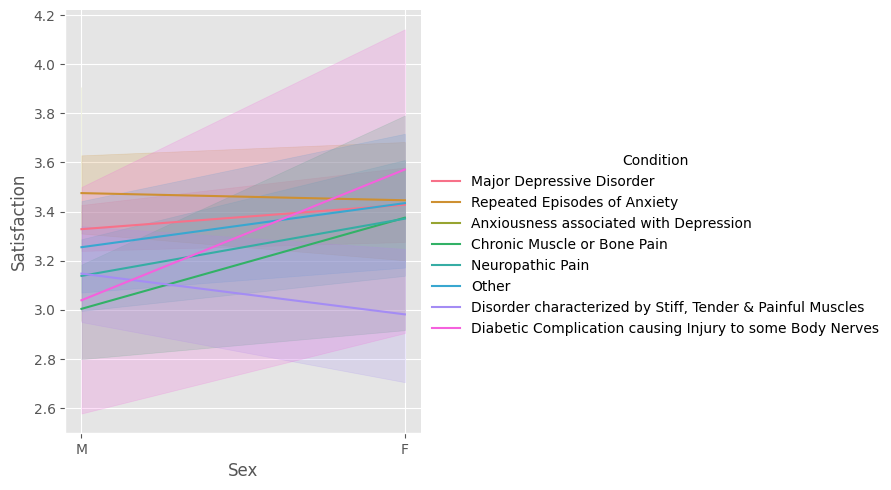

In [71]:
plt.figure(figsize=(10,15))
sns.relplot(y="Satisfaction", x="Sex",hue="Condition" ,kind="line",
            dashes=False, markers=True,data=data);

# Label encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex"]:
    data[col]=label.fit_transform(data[col])
    data_cpy[col]=label.fit_transform(data_cpy[col])
datastand=data



In [73]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,4,4,5,no side effects,5,12,1
1,6,7,3,extreme severe side effects,1,0,1
2,6,0,5,no side effects,5,0,1
3,5,0,3,moderate side effects,2,0,1
4,7,0,3,moderate side effects,1,1,1


# Data splitting:

In [74]:
y=data['Effectiveness']
x=data.drop(['Effectiveness'],axis=1)
x1=x
x2=x

ycp=data_cpy['Effectiveness']
xcp=data_cpy.drop(['Effectiveness'],axis=1)



In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)



xcp_train,xcp_test,ycp_train,ycp_test=train_test_split(xcp,ycp,random_state=42,test_size=0.1)

In [76]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix

# Model Selection

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("accuracy is",accuracy_score(y_test,y_pred))
print("confusion matrix is",confusion_matrix(y_test,y_pred))

accuracy is 0.5251989389920424
confusion matrix is [[38  2 12  1  1]
 [ 6 49 14 23  3]
 [18 32 23  4  4]
 [ 2 17  6 88  2]
 [19  6  7  0  0]]


# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_decision=decision.predict(x_test)

print("accuracy is",accuracy_score(y_test,y_decision))
print("confusion matrix is",confusion_matrix(y_test,y_decision))

accuracy is 0.519893899204244
confusion matrix is [[31  3 11  3  6]
 [ 4 44 18 25  4]
 [12 26 29  5  9]
 [ 2 21  6 85  1]
 [13  2  8  2  7]]


# Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
y_grad=grad.predict(x_test)

print("accuracy is",accuracy_score(y_test,y_grad))
print("confusion matrix is",confusion_matrix(y_test,y_grad))

accuracy is 0.6206896551724138
confusion matrix is [[45  1  4  1  3]
 [ 6 48 18 22  1]
 [13 18 45  1  4]
 [ 3 11  8 93  0]
 [15  1 12  1  3]]


# Linear SVM

In [80]:
from sklearn.svm import LinearSVC
support=LinearSVC()
support.fit(x_train,y_train)
y_support=support.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [81]:
print("accuracy is",accuracy_score(y_test,y_support))
print("confusion matrix is",confusion_matrix(y_test,y_support))

accuracy is 0.5411140583554377
confusion matrix is [[ 50   0   1   3   0]
 [  7  25  10  53   0]
 [ 14  19  23  25   0]
 [  3   5   1 106   0]
 [ 16   1  12   3   0]]


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train,y_train)
y_rand=rand.predict(x_test)

In [83]:
print("accuracy is",accuracy_score(y_test,y_rand))
print("confusion matrix is",confusion_matrix(y_test,y_rand))

accuracy is 0.5384615384615384
confusion matrix is [[32  1 11  3  7]
 [ 5 45 18 23  4]
 [ 9 25 31  5 11]
 [ 3 14  7 90  1]
 [12  2  9  4  5]]


# Fine tuning of parametres

In [84]:
randfine=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine.fit(x_train,y_train)
y_randfine=randfine.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_randfine))
print("confusion matrix is",confusion_matrix(y_test,y_randfine))

accuracy is 0.5517241379310345
confusion matrix is [[32  0 12  3  7]
 [ 5 46 18 23  3]
 [ 7 21 35  6 12]
 [ 3 14  7 90  1]
 [12  2 10  3  5]]


# Bernoulli Naive Bayes

In [85]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
y_bnb=BNB.predict(x_test)


In [86]:
print("accuracy is",accuracy_score(y_test,y_bnb))
print("confusion matrix is",confusion_matrix(y_test,y_bnb))

accuracy is 0.3156498673740053
confusion matrix is [[  0   0   3  51   0]
 [  0   0  12  83   0]
 [  0   0  11  70   0]
 [  0   0   7 108   0]
 [  0   0   6  26   0]]


# Standardisation

In [87]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x=standard.fit_transform(x)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

# KNN

In [89]:
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier1.fit(x_train,y_train)
y_pred1=classifier1.predict(x_test)
acc=accuracy_score(y_test,y_pred1)
print("accuracy is",acc)

accuracy is 0.5649867374005305


# Decision Tree

In [90]:
decision1=DecisionTreeClassifier()
decision1.fit(x_train,y_train)
y_decision1=decision1.predict(x_test)
acc=accuracy_score(y_test,y_decision1)
print("accuracy is",acc)

accuracy is 0.5278514588859416


# Fine tuning of parameters:

In [91]:
decisionfine1=DecisionTreeClassifier(max_depth=100,random_state=42)
decisionfine1.fit(x_train,y_train)
y_decisionfine1=decisionfine1.predict(x_test)
acc=accuracy_score(y_test,y_decisionfine1)
print("accuracy is",acc)

accuracy is 0.5172413793103449


# Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
y_grad1=grad.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_grad1))

accuracy is 0.6206896551724138


# Linear SVM

In [93]:
support1=LinearSVC()
support1.fit(x_train,y_train)
y_support1=support1.predict(x_test)
acc=accuracy_score(y_test,y_support1)
print("accuracy is",acc)

accuracy is 0.5437665782493368


# Random Forest

In [94]:
rand1=RandomForestClassifier()
rand1.fit(x_train,y_train)
y_rand1=rand1.predict(x_test)
acc=accuracy_score(y_test,y_rand1)
print("accuracy is",acc)

accuracy is 0.5305039787798409


In [95]:
randfine1=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine1.fit(x_train,y_train)
y_randfine1=randfine1.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_randfine1))

accuracy is 0.5464190981432361


# Bernoulli Naive Bayes

In [96]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
y_bnb1=BNB.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_bnb1))


accuracy is 0.5039787798408488


# Normalization

In [97]:
from sklearn.preprocessing import Normalizer
nrm=Normalizer()
x1=nrm.fit_transform(x1)

In [98]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.1,random_state=42)

# KNN

In [99]:
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier1.fit(x1_train,y_train)
y_pred2=classifier1.predict(x1_test)
acc=accuracy_score(y_test,y_pred2)
print("accuracy is",acc)

accuracy is 0.506631299734748


# Decision Tree

In [100]:
decision1=DecisionTreeClassifier()
decision1.fit(x1_train,y_train)
y_decision2=decision1.predict(x1_test)
acc=accuracy_score(y_test,y_decision2)
print("accuracy is",acc)

accuracy is 0.4880636604774536


# Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x1_train,y_train)
y_grad2=grad.predict(x1_test)
print("accuracy is",accuracy_score(y_test,y_grad2))

accuracy is 0.5596816976127321


# Linear SVM

In [102]:
support1=LinearSVC()
support1.fit(x1_train,y_train)
y_support2=support1.predict(x1_test)
acc=accuracy_score(y_test,y_support2)
print("accuracy is",acc)

accuracy is 0.47745358090185674


# Random Forest

In [103]:
rand2=RandomForestClassifier()
rand2.fit(x1_train,y_train)
y_rand2=rand2.predict(x1_test)
acc=accuracy_score(y_test,y_rand2)
print("accuracy is",acc)

accuracy is 0.5358090185676393


# Fine tuning:

In [104]:
randfine2=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine2.fit(x1_train,y_train)
y_randfine2=randfine2.predict(x1_test)
print("accuracy is",accuracy_score(y_test,y_randfine2))

accuracy is 0.5305039787798409


# Bernoulli Naive Bayes

In [105]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(x1_train,y_train)
y_bnb2=BNB.predict(x1_test)
print("accuracy is",accuracy_score(y_test,y_bnb2))


accuracy is 0.3156498673740053


# MinMax Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
minmax1=MinMaxScaler()
x2=minmax1.fit_transform(x2)
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.1,random_state=42)

# KNN

In [107]:
classifier3=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier3.fit(x2_train,y_train)
y_pred3=classifier3.predict(x2_test)
acc=accuracy_score(y_test,y_pred3)
print("accuracy is",acc)

accuracy is 0.5915119363395226


# Decision Tree

In [108]:
decision3=DecisionTreeClassifier()
decision3.fit(x2_train,y_train)
y_decision3=decision3.predict(x2_test)
acc=accuracy_score(y_test,y_decision3)
print("accuracy is",acc)

accuracy is 0.5278514588859416


# Fine Tuning

In [109]:
decisionfine3=DecisionTreeClassifier(max_depth=100,random_state=42)
decisionfine3.fit(x2_train,y_train)
y_decisionfine3=decisionfine3.predict(x2_test)
acc=accuracy_score(y_test,y_decisionfine3)
print("accuracy is",acc)

accuracy is 0.5225464190981433


# Gradient Boosting

In [110]:
grad3=GradientBoostingClassifier()
grad3.fit(x2_train,y_train)
y_grad3=grad3.predict(x2_test)
acc=accuracy_score(y_test,y_grad3)
print("accuracy is",acc)

accuracy is 0.6206896551724138


# Linear SVM

In [111]:
support3=LinearSVC()
support3.fit(x2_train,y_train)
y_support3=support3.predict(x2_test)
acc=accuracy_score(y_test,y_support3)
print("accuracy is",acc)

accuracy is 0.5437665782493368


# Bernoulli Naive Bayes

In [112]:
BNB=BernoulliNB()
BNB.fit(x2_train,y_train)
y_bnb3=BNB.predict(x2_test)
print("accuracy is",accuracy_score(y_test,y_bnb3))


accuracy is 0.4880636604774536


# Random Forest

In [113]:
rand3=RandomForestClassifier()
rand3.fit(x2_train,y_train)
y_rand3=rand3.predict(x2_test)
acc=accuracy_score(y_test,y_rand3)
print("accuracy is",acc)

accuracy is 0.5251989389920424


# Fine tuning:

In [114]:
randfine3=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine3.fit(x2_train,y_train)
y_randfine3=randfine3.predict(x2_test)
print("accuracy is",accuracy_score(y_test,y_randfine3))

accuracy is 0.5411140583554377


# Feature Importance

In [115]:
pd.Series(randfine.feature_importances_,index=['Age', 'Condition', 'EaseofUse', 'Satisfaction', 'Sex',
       'UsefulCount']).sort_values(ascending=False)*100

Satisfaction    39.154772
Sex             22.729933
Age             14.687414
Condition       13.049750
EaseofUse        7.400948
UsefulCount      2.977183
dtype: float64

# Since we are getting Accuracy of Gradient Boosting as 62%,let us  now check the accuracy by without removing the outliers of Ease of Use and Useful count column

# KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(xcp_train,ycp_train)
ycp_pred=classifier.predict(xcp_test)
acc=accuracy_score(ycp_test,ycp_pred)
print("accuracy is",accuracy_score(ycp_test,ycp_pred))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_pred))

accuracy is 0.5913978494623656
confusion matrix is [[ 86   3   9   1   5]
 [  7  53  14  27   0]
 [ 16  24  29   5   5]
 [  5  27   7 103   0]
 [ 18   6  10   1   4]]


# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(xcp_train,ycp_train)
ycp_decision=decision.predict(xcp_test)

print("accuracy is",accuracy_score(ycp_test,ycp_decision))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_decision))

accuracy is 0.5204301075268817
confusion matrix is [[63  9 14  5 13]
 [ 6 52 19 23  1]
 [ 9 19 34  6 11]
 [ 3 43  6 88  2]
 [14  3 13  4  5]]


# Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(xcp_train,ycp_train)
ycp_grad=grad.predict(xcp_test)

print("accuracy is",accuracy_score(ycp_test,ycp_grad))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_grad))

accuracy is 0.6989247311827957
confusion matrix is [[ 97   0   3   1   3]
 [  7  58  14  21   1]
 [ 12  11  50   1   5]
 [  5  15   8 114   0]
 [ 17   3  13   0   6]]


# LINEAR SVM

In [119]:
supportcp=LinearSVC()
supportcp.fit(xcp_train,ycp_train)
ycp_support=support3.predict(xcp_test)
acc_cp=accuracy_score(ycp_test,ycp_support)
print("accuracy is",acc_cp)

accuracy is 0.3053763440860215


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


# Random Forest

In [120]:
randcp=RandomForestClassifier(max_depth=100,n_estimators=100)
randcp.fit(xcp_train,ycp_train)
ycp_randcp=randcp.predict(xcp_test)
print("accuracy is",accuracy_score(ycp_test,ycp_randcp))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_randcp))

accuracy is 0.5849462365591398
confusion matrix is [[ 73   4  10   2  15]
 [  5  52  22  22   0]
 [  8  21  36   4  10]
 [  3  28   6 103   2]
 [ 15   1  15   0   8]]


# Bernoulli Naive Bayes

In [121]:
BNB=BernoulliNB()
BNB.fit(xcp_train,ycp_train)
ycp_bnb=BNB.predict(xcp_test)
print("accuracy is",accuracy_score(ycp_test,ycp_bnb))


accuracy is 0.3247311827956989


# Evaluating Model

In [122]:
ycp_test.value_counts()

no side effects                142
extreme severe side effects    104
mild side effects              101
moderate side effects           79
severe side effects             39
Name: Effectiveness, dtype: int64

In [123]:
df=pd.DataFrame({"y_predicted": ycp_grad,"original":ycp_test})
df.head()

,y_predicted,original
350,extreme severe side effects,moderate side effects
3439,no side effects,no side effects
1020,mild side effects,no side effects
4291,no side effects,no side effects
2846,mild side effects,no side effects


In [124]:
pd.crosstab(df["y_predicted"],df["original"])

original,extreme severe side effects,mild side effects,moderate side effects,no side effects,severe side effects
y_predicted,,,,,
extreme severe side effects,97,7,12,5,17
mild side effects,0,58,11,15,3
moderate side effects,3,14,50,8,13
no side effects,1,21,1,114,0
severe side effects,3,1,5,0,6


# Conclusion:

The Side effect of the drug is best modelled by Gradient Boosting without doing any scaling and standardisation.
People in  the age group 45-54 mostly used this drug and within that the male ratio was higher.
People with the condition 'Major Depressive Disorder' consumed this drug more.
Over all by comparing with race also,the male ratio is higher.